# DATATHON PI02 - DATA 03

### IMPORTACION DE DATOS

In [405]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, recall_score
sns.set()


In [406]:
X_full = pd.read_excel('../Datathon/E-Commerce_train.xlsx', index_col='ID')
X_test_full = pd.read_excel('../Datathon/E-Commerce_test.xlsx', index_col='ID')

In [407]:
X_full = X_full.rename_axis(None) #Removemos el nombre de la columna ID

In [408]:
X_test_full = X_test_full.rename_axis(None)

In [409]:
X_test_full

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
9000,F,Ship,5,1,189,2,medium,M,10,5248
9001,D,Ship,5,3,150,2,high,F,9,4446
9002,F,Ship,3,3,200,3,low,M,3,5739
9003,A,Ship,5,1,133,2,medium,M,1,4643
9004,B,Ship,4,2,260,3,low,M,4,5504
...,...,...,...,...,...,...,...,...,...,...
10995,A,Ship,4,1,252,5,medium,F,1,1538
10996,B,Ship,4,1,232,5,medium,F,6,1247
10997,C,Ship,5,4,242,5,low,F,4,1155
10998,F,Ship,5,2,223,6,medium,M,2,1210


In [410]:
X_test_full.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
9000,F,Ship,5,1,189,2,medium,M,10,5248
9001,D,Ship,5,3,150,2,high,F,9,4446
9002,F,Ship,3,3,200,3,low,M,3,5739
9003,A,Ship,5,1,133,2,medium,M,1,4643
9004,B,Ship,4,2,260,3,low,M,4,5504


### EXPLORACION DE DATOS

In [411]:
X_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8999 entries, 1 to 8999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      8999 non-null   object
 1   Mode_of_Shipment     8999 non-null   object
 2   Customer_care_calls  8999 non-null   int64 
 3   Customer_rating      8999 non-null   int64 
 4   Cost_of_the_Product  8999 non-null   int64 
 5   Prior_purchases      8999 non-null   int64 
 6   Product_importance   8999 non-null   object
 7   Gender               8999 non-null   object
 8   Discount_offered     8999 non-null   int64 
 9   Weight_in_gms        8999 non-null   int64 
 10  Reached.on.Time_Y.N  8999 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 843.7+ KB


- Buscar valores faltantes

In [412]:
X_full.isna().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [413]:
X_full.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000
mean,4.015113,2.994999,208.561507,3.511501,15.097678,3584.364596,0.635515
std,1.138934,1.413143,48.289172,1.532074,17.400040,1614.750194,0.481312
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,168.000000,3.000000,4.000000,1857.000000,0.000000
50%,4.000000,3.000000,211.000000,3.000000,8.000000,4046.000000,1.000000
75%,5.000000,4.000000,249.500000,4.000000,19.000000,4999.500000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


- Estudio de correlacion entre campos

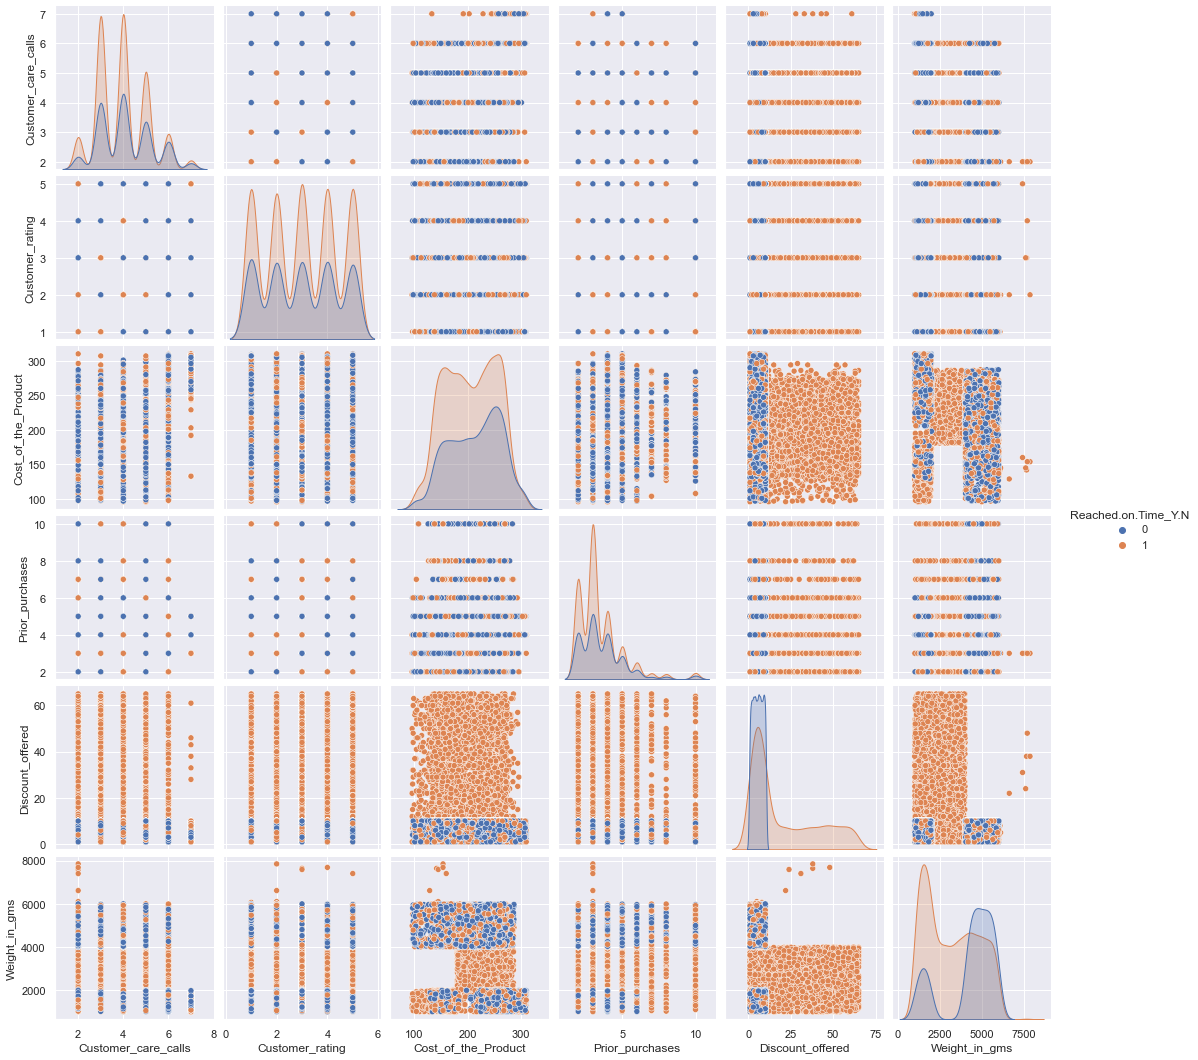

In [414]:
sns.pairplot(X_full, hue='Reached.on.Time_Y.N')
plt.show()

- Estudio de variables categoricas

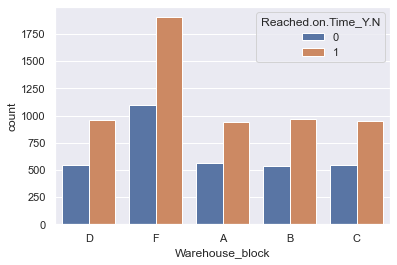

In [415]:
sns.countplot(x='Warehouse_block', hue='Reached.on.Time_Y.N', data=X_full)
plt.show()

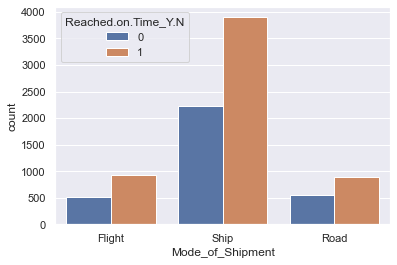

In [416]:
sns.countplot(x='Mode_of_Shipment', hue='Reached.on.Time_Y.N', data=X_full)
plt.show()

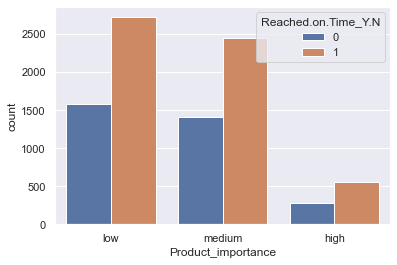

In [417]:
sns.countplot(x='Product_importance', hue='Reached.on.Time_Y.N', data=X_full)
plt.show()

In [418]:
corr = X_full.corr()
corr

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Customer_care_calls,1.000000,0.012131,0.318109,0.164541,-0.128805,-0.237731,-0.072261
Customer_rating,0.012131,1.000000,0.009818,0.015606,-0.004315,-0.000227,0.011045
Cost_of_the_Product,0.318109,0.009818,1.000000,0.100637,-0.138259,-0.057113,-0.083470
Prior_purchases,0.164541,0.015606,0.100637,1.000000,-0.072634,-0.113060,-0.048269
Discount_offered,-0.128805,-0.004315,-0.138259,-0.072634,1.000000,-0.417782,0.416357
Weight_in_gms,-0.237731,-0.000227,-0.057113,-0.113060,-0.417782,1.000000,-0.326877
Reached.on.Time_Y.N,-0.072261,0.011045,-0.083470,-0.048269,0.416357,-0.326877,1.000000


- Se grafica correlacion entre campos con HeatMap

In [419]:
def plot_corre_heatmap(corr):
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cbar=True, square=False, annot=True, fmt='.2f', annot_kws={'size': 15}, cmap='coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    
    b, t = plt.ylim()
    b += 0.5
    t -= 0.5
    plt.ylim(b,t)
    plt.show()

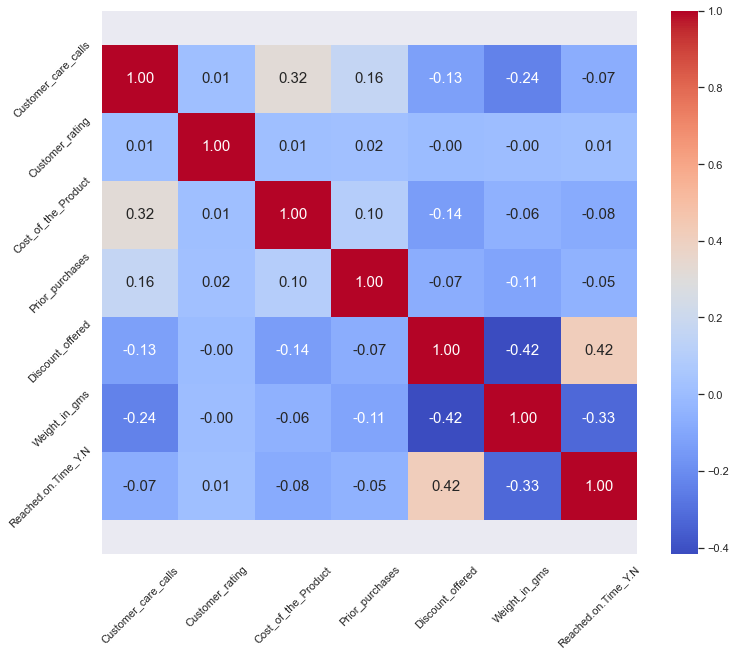

In [420]:
plot_corre_heatmap(corr)

### SELECCION DE FEATURES

In [421]:
columnas_categoricas = ['Mode_of_Shipment', 'Product_importance']
columnas_numericas = ['Discount_offered', 'Weight_in_gms']

In [422]:
y = X_full['Reached.on.Time_Y.N']

In [423]:
X = X_full[columnas_categoricas + columnas_numericas]

- Normalizar variables categoricas con get_dummies (Tambien se puede utilizar OneHotEncoder)

In [424]:
X = pd.concat([X, pd.get_dummies(X['Mode_of_Shipment'])], axis=1)

In [425]:
X = pd.concat([X, pd.get_dummies(X['Product_importance'])], axis=1)

In [426]:
X.drop(columns=['Mode_of_Shipment', 'Product_importance'], axis=1, inplace=True)


In [427]:
X_test = X_test_full[columnas_categoricas + columnas_numericas]

In [428]:
X_test = pd.concat([X_test, pd.get_dummies(X_test['Mode_of_Shipment'])], axis=1)

In [429]:
X_test = pd.concat([X_test, pd.get_dummies(X_test['Product_importance'])], axis=1)

In [430]:
X_test.drop(columns=['Mode_of_Shipment', 'Product_importance'], axis=1, inplace=True)

In [431]:
print(X.shape)
print(X_test.shape)

(8999, 8)
(2000, 8)


- Separar muestra para datos de entrenamiento y datos de validacion

In [432]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, train_size=0.7778, test_size=0.2222, random_state=0)

In [433]:
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)
print(X_test)

(6999, 8)
(2000, 8)
(6999,)
(2000,)
       Discount_offered  Weight_in_gms  Flight  Road  Ship  high  low  medium
9000                 10           5248       0     0     1     0    0       1
9001                  9           4446       0     0     1     1    0       0
9002                  3           5739       0     0     1     0    1       0
9003                  1           4643       0     0     1     0    0       1
9004                  4           5504       0     0     1     0    1       0
...                 ...            ...     ...   ...   ...   ...  ...     ...
10995                 1           1538       0     0     1     0    0       1
10996                 6           1247       0     0     1     0    0       1
10997                 4           1155       0     0     1     0    1       0
10998                 2           1210       0     0     1     0    0       1
10999                 6           1639       0     0     1     0    1       0

[2000 rows x 8 columns]


- Preprocesar datos de los campos numericos y estandarizar los valores para mejorar precision

In [434]:
from sklearn.preprocessing import StandardScaler

In [435]:
#Scaling numeric features using sklearn StandardScalar
sc=StandardScaler()
X_train[columnas_numericas]=sc.fit_transform(X_train[columnas_numericas])
X_test[columnas_numericas]=sc.transform(X_test[columnas_numericas])

c:\Users\cncorvalan\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [436]:
X_train

,Discount_offered,Weight_in_gms,Flight,Road,Ship,high,low,medium
8369,-0.351933,0.586311,1,0,0,0,0,1
3382,-0.752683,0.514012,0,0,1,0,1,0
7619,-0.580933,1.149254,0,0,1,0,1,0
231,2.224316,-1.271216,0,0,1,0,1,0
5985,-0.351933,0.410198,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...
4374,-0.466433,0.577660,0,1,0,0,1,0
7892,-0.409183,0.992916,0,0,1,0,1,0
4860,-0.409183,1.333400,0,0,1,0,1,0
3265,-0.752683,0.815567,0,1,0,0,1,0


- Importar y seleccionar modelo junto con metricas de medicion

In [437]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
import numpy as np

- Se opta por modelo LogisticRegression por brindar mejores resultados contra DecisionTreeClassifier

In [438]:
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [439]:
#dt = DecisionTreeClassifier()
#dt.fit(X_train, y_train)
#pred = dt.predict(X_test)


- Se establece matriz de confusion

In [440]:
class_nombres = ['Not_Arrive','Arrive']
matrix = confusion_matrix(y_valid, pred)

In [441]:
df = pd.DataFrame(matrix, index= class_nombres, columns= class_nombres)

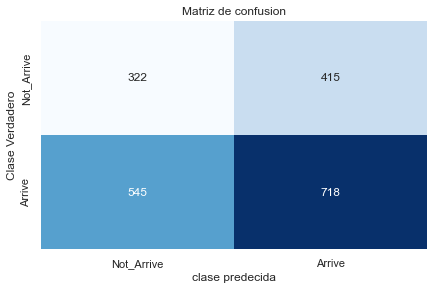

In [442]:
sns.heatmap(df, annot=True, cbar=None, cmap='Blues', fmt = 'g')
plt.title('Matriz de confusion'), plt.tight_layout()
plt.ylabel('Clase Verdadero'), plt.xlabel('clase predecida')
plt.show()

- Medimos SCORE & RECALL de nuestro modelo

In [443]:
from sklearn.metrics import f1_score, recall_score
f1_score = round(f1_score(y_valid, pred), 2)
recall_score = round(recall_score(y_valid, pred), 2)
print("Recall para logistic regresion model :{recall_score}".format(recall_score = recall_score))
print("F1 Score para logistic regresion model :{f1_score}".format(f1_score = f1_score))


Recall para logistic regresion model :0.57
F1 Score para logistic regresion model :0.6


In [444]:
from sklearn.metrics import classification_report
 
print(classification_report(y_valid, pred))

              precision    recall  f1-score   support

           0       0.37      0.44      0.40       737
           1       0.63      0.57      0.60      1263

    accuracy                           0.52      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.54      0.52      0.53      2000



- Exportar predicciones

In [445]:
df_pred = pd.DataFrame(pred, columns=['pred'])

In [446]:
df_pred.to_csv('corderous.csv', index=False)